# Edge Detection - from Video

### Canny Edge Detection in openCV

In [36]:
import cv2
import numpy as np

In [37]:
cap = cv2.VideoCapture('demo.mp4')

### Error detection 

In [38]:
if (cap.isOpened()== False): 
  print("Enter a Valid Path")

### Reading the video

In [39]:
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
 
    # Converting the image to grayscale.
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('Frame', gray)

    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break
cap.release()
cv2.destroyAllWindows()

### Detection

In [40]:
# gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray = frame
edges = cv2.Canny(gray, 20, 30)
# Using the Canny filter with different parameters
edges_high_thresh = cv2.Canny(gray, 60, 120)
# Stacking the images to print them together
# For comparison
images = np.hstack((gray, edges, edges_high_thresh))

# Display the resulting frame
cv2.imshow('Frame', images)

TypeError: Expected cv::UMat for argument 'mat'

### Bilateral Filtering

In [1]:
# Converting the image to grayscale.
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Smoothing without removing edges.
gray_filtered = cv2.bilateralFilter(gray, 7, 50, 50)

# Applying the canny filter
edges = cv2.Canny(gray, 60, 120)
edges_filtered = cv2.Canny(gray_filtered, 60, 120)

# Stacking the images to print them together for comparison
images = np.hstack((gray, edges, edges_filtered))

# Display the resulting frame
cv2.imshow('Frame', canny_images)

NameError: name 'cv2' is not defined

In [ ]:
fgbg = cv2.createBackgroundSubtractorMOG2(
    history=10,
    varThreshold=2,
    detectShadows=False)

# Read the video
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
 
    # Converting the image to grayscale.
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Extract the foreground
    edges_foreground = cv2.bilateralFilter(gray, 9, 75, 75)
    foreground = fgbg.apply(edges_foreground)
    
    # Smooth out to get the moving area
    kernel = np.ones((50,50),np.uint8)
    foreground = cv2.morphologyEx(foreground, cv2.MORPH_CLOSE, kernel)

    # Applying static edge extraction
    edges_foreground = cv2.bilateralFilter(gray, 9, 75, 75)
    edges_filtered = cv2.Canny(edges_foreground, 60, 120)

    # Crop off the edges out of the moving area
    cropped = (foreground // 255) * edges_filtered

    # Stacking the images to print them together for comparison
    images = np.hstack((gray, edges_filtered, cropped))

# Edge detection and manipulation - from Image

### Pillow Library

In [41]:
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.2.0


In [42]:
from PIL import Image
# Open the image form working directory
image = Image.open('demo.png')
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

PNG
(1200, 900)
RGBA


### MatplotLib

float32
(900, 1200, 4)


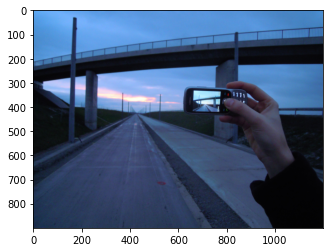

In [43]:
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = image.imread('demo.png')
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

### Print Information

In [44]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('demo.png')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(900, 1200, 4)
<class 'PIL.Image.Image'>
RGBA
(1200, 900)


In [26]:
print(data)

[[[ 96 171 247 255]
  [ 95 169 244 255]
  [ 94 169 243 255]
  ...
  [ 75 141 211 255]
  [ 76 140 211 255]
  [ 75 141 207 255]]

 [[ 95 171 244 255]
  [ 94 170 243 255]
  [ 94 171 242 255]
  ...
  [ 75 140 209 255]
  [ 78 143 211 255]
  [ 76 143 209 255]]

 [[ 92 172 239 255]
  [ 94 172 240 255]
  [ 96 172 241 255]
  ...
  [ 76 139 205 255]
  [ 77 141 209 255]
  [ 78 143 209 255]]

 ...

 [[ 31  39  77 255]
  [ 26  34  71 255]
  [ 29  41  76 255]
  ...
  [  3   3   5 255]
  [  4   4   6 255]
  [  3   3   5 255]]

 [[ 31  33  67 255]
  [ 30  33  66 255]
  [ 27  37  69 255]
  ...
  [  3   3   5 255]
  [  4   4   6 255]
  [  4   4   6 255]]

 [[ 30  38  48 255]
  [ 30  37  55 255]
  [ 31  40  70 255]
  ...
  [  4   4   6 255]
  [  5   5   7 255]
  [  3   3   5 255]]]


### Conversion to Grayscale

In [45]:
import numpy as np
from PIL import Image

im = np.array(Image.open('demo.png').convert('L')) #you can pass multiple arguments in single line
print(type(im))

gr_im= Image.fromarray(im).save('demo1.png')

<class 'numpy.ndarray'>


### Resizing

In [46]:
load_img_rz = np.array(Image.open('demo.png').resize((200,200)))
Image.fromarray(load_img_rz).save('demo2.png')
print("After resizing:",load_img_rz.shape)

After resizing: (200, 200, 4)


### Trimming

In [47]:
im = np.array(Image.open('demo.png'))

print("Before trimming:",im.shape)

im_trim = im[128:384, 128:384]
print("After trimming:",im_trim.shape)

Image.fromarray(im_trim).save('demo3.png')

Before trimming: (900, 1200, 4)
After trimming: (256, 256, 4)


### Edge detection

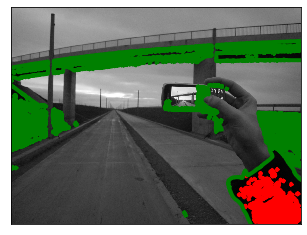

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from skimage import measure
import scipy.ndimage as ndimage
from skimage.color import rgb2gray
from pprint import pprint
#Load image
im = rgb2gray(skimage.io.imread('demo.png'))

n, bins_edges = np.histogram(im.flatten(),bins = 100)
# Skip the black area, and assume two distinct regions, white and grey
max_counts = np.sort(n[bins_edges[0:-1] > 0])[-2:]
thresholds = np.select(
    [max_counts[i] == n for i in range(max_counts.shape[0])],
    [bins_edges[0:-1]] * max_counts.shape[0]
)
# filter our the non zero values
thresholds = thresholds[thresholds > 0] 


fig, axs = plt.subplots()
# Display image
axs.imshow(im, interpolation='nearest', cmap=plt.cm.gray)
colors = ['r','g']
for i, threshold in enumerate(thresholds):
    contours = measure.find_contours(im, threshold)

    # Display  all contours found for this threshold
    for n, contour in enumerate(contours):
        axs.plot(contour[:,1], contour[:,0],colors[i], lw = 4)

axs.axis('image')
axs.set_xticks([])
axs.set_yticks([])        
plt.show()

# Edge Detection - from camera

In [1]:
import cv2  
  
# np is an alias pointing to numpy library 
import numpy as np 
  
  
# capture frames from a camera 
cap = cv2.VideoCapture(0) 
  
  
# loop runs if capturing has been initialized 
while(1): 
  
    # reads frames from a camera 
    ret, frame = cap.read() 
  
    # converting BGR to HSV 
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 
      
    # define range of red color in HSV 
    lower_red = np.array([30,150,50]) 
    upper_red = np.array([255,255,180]) 
      
    # create a red HSV colour boundary and  
    # threshold HSV image 
    mask = cv2.inRange(hsv, lower_red, upper_red) 
  
    # Bitwise-AND mask and original image 
    res = cv2.bitwise_and(frame,frame, mask= mask) 
  
    # Display an original image 
    cv2.imshow('Original',frame) 
  
    # finds edges in the input image image and 
    # marks them in the output map edges 
    edges = cv2.Canny(frame,100,200) 
  
    # Display edges in a frame 
    cv2.imshow('Edges',edges) 
  
    # Wait for Esc key to stop 
    k = cv2.waitKey(5) & 0xFF
    if k == 27: 
        break

# Close the window 
cap.release() 
  
# De-allocate any associated memory usage 
cv2.destroyAllWindows()  

# Erosion and Dilation

In [2]:
import cv2 
import numpy as np 
  
# Reading the input image 
img = cv2.imread('input.png', 0) 
  
# Taking a matrix of size 5 as the kernel 
kernel = np.ones((5,5), np.uint8) 
  
# The first parameter is the original image, 
# kernel is the matrix with which image is  
# convolved and third parameter is the number  
# of iterations, which will determine how much  
# you want to erode/dilate a given image.  
img_erosion = cv2.erode(img, kernel, iterations=1) 
img_dilation = cv2.dilate(img, kernel, iterations=1) 
  
cv2.imshow('Input', img) 
cv2.imshow('Erosion', img_erosion) 
cv2.imshow('Dilation', img_dilation) 
  
cv2.waitKey(0) 

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-9d_dfo3_\opencv\modules\imgproc\src\morph.dispatch.cpp:1010: error: (-215:Assertion failed) !src.empty() in function 'cv::erode'


### References

In [3]:
# https://medium.com/sicara/opencv-edge-detection-tutorial-7c3303f10788
# https://www.sicara.ai/blog/2019-03-12-edge-detection-in-opencv
# https://www.quora.com/How-do-I-set-the-upper-and-lower-threshold-in-canny-edge-detection
# https://docs.opencv.org/master/da/d22/tutorial_py_canny.html
# https://www.geeksforgeeks.org/real-time-edge-detection-using-opencv-python/
# https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays
# https://stackoverflow.com/questions/29434533/edge-detection-for-image-stored-in-matrix
# https://www.geeksforgeeks.org/erosion-dilation-images-using-opencv-python/